In [4]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_2d(x, y, mean, cov):
    X = np.stack((x, y), axis=-1)
    inv_cov = np.linalg.inv(cov)
    diff = X - mean
    exponent = -0.5 * np.einsum('...k,kl,...l->...', diff, inv_cov, diff)
    return np.exp(exponent) / (2 * np.pi * np.sqrt(np.linalg.det(cov)))

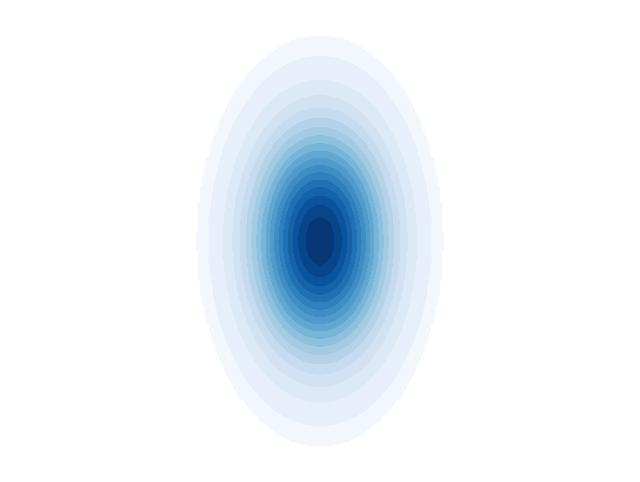

In [24]:
mean = [0, 0]  # This is the mean (center) of the distribution
covariance = [[0.2, 0], [0, 1.]]  # This is the covariance matrix, defining the spread and orientation
# Increase the resolution of the grid for smoother contours
x_high_res = np.linspace(-3, 3, 300)
y_high_res = np.linspace(-3, 3, 300)
X_high_res, Y_high_res = np.meshgrid(x_high_res, y_high_res)

# Calculate the 2D Gaussian values for the higher resolution grid
Z_high_res = gaussian_2d(X_high_res, Y_high_res, mean, covariance)

# Filter the Z values to only include densities above 0.04
Z_filtered_high_res = np.where(Z_high_res > 0.01, Z_high_res, np.nan)

# Plot the 2D Gaussian with the filtered values and smoother contours
plt.figure(figsize=(8, 6), facecolor='white')
plt.contourf(X_high_res, Y_high_res, Z_filtered_high_res, levels=20, cmap='Blues')
##plt.colorbar(label='Density')
#plt.title('2D Gaussian Distribution (Density > 0.04) - Smoother Contours')
#plt.xlabel('X')
#plt.ylabel('Y')
#plt.grid(True)
plt.axis('off')  # Hides the axes
plt.show()